<a href="https://colab.research.google.com/github/Muhammad-ismail2134/CODSOFT/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 02 Credit Card Fraud Detection


## Importing Libararies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
!pip install kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

## Downloading Dataset from kaggle

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

 99% 199M/202M [00:07<00:00, 26.7MB/s]
100% 202M/202M [00:07<00:00, 27.9MB/s]


## Unzipping dataset

In [ ]:
import zipfile

#Unzipping dataset from kaggle
local_zip = './fraud-detection.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./fraud-detection')

In [ ]:
train_data = pd.read_csv('/content/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/content/fraud-detection/fraudTest.csv')

## Dropping null rows

In [ ]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

## Dataset preview

In [ ]:
print(train_data.shape[0])

1296675


In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Dataset datatypes

In [ ]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

## Plotting Genuine and Fraud Transactions

In [ ]:
import plotly.express as px
from matplotlib import pyplot as plt
labels=["Genuine","Fraud"]

fraud_or_not = train_data["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=train_data['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

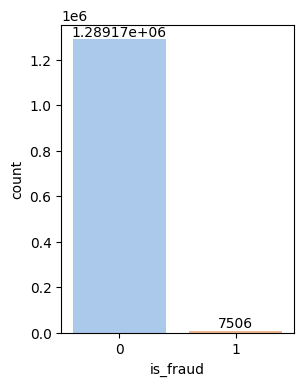

In [ ]:
import seaborn as sns
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=train_data,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

The dataset is imbalenced so we will use oversampling via SMOTE

## Dropping duplicate values

In [ ]:
train_data = train_data.copy()

train_data.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
train_data.shape

(1296675, 23)

In [ ]:
features = ['amt','lat','long','merch_lat','merch_long','city_pop']

In [ ]:
X_train = train_data[features]
X_test = test_data[features]

## Scaling Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Oversampling using SMOTE

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
oversampled_X, oversampled_y = smote.fit_resample(X_train, train_data['is_fraud'])

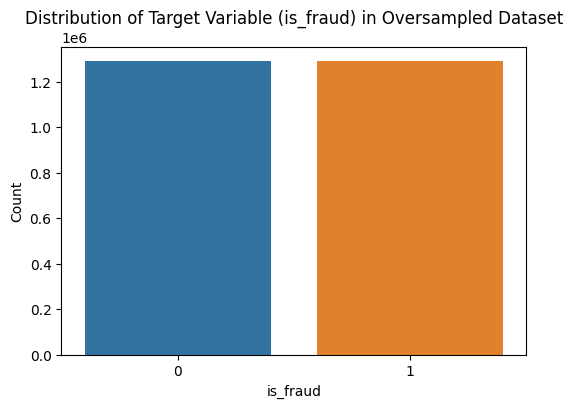

In [ ]:
class_counts = pd.Series(oversampled_y).value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Target Variable (is_fraud) in Oversampled Dataset')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
#Testing Lables
testing_labels = test_data['is_fraud']

## Creating Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np

model = Sequential([
          tf.keras.layers.Dense(32,input_dim=6,activation='relu'),
          tf.keras.layers.Dense(20,activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


## Training Model

In [ ]:
NUM_EPOCHS = 25
history = model.fit(oversampled_X, oversampled_y , epochs=NUM_EPOCHS, validation_data=(X_test ,testing_labels))

Epoch 1/25
80574/80574 [==============================] - 216s 3ms/step - loss: 0.2655 - accuracy: 0.8871 - val_loss: 0.2253 - val_accuracy: 0.8806
Epoch 2/25
80574/80574 [==============================] - 194s 2ms/step - loss: 0.2400 - accuracy: 0.8962 - val_loss: 0.2731 - val_accuracy: 0.8525
Epoch 3/25
80574/80574 [==============================] - 194s 2ms/step - loss: 0.2360 - accuracy: 0.8979 - val_loss: 0.2096 - val_accuracy: 0.9027
Epoch 4/25
80574/80574 [==============================] - 209s 3ms/step - loss: 0.2324 - accuracy: 0.8995 - val_loss: 0.2134 - val_accuracy: 0.8979
Epoch 5/25
80574/80574 [==============================] - 211s 3ms/step - loss: 0.2298 - accuracy: 0.9005 - val_loss: 0.2280 - val_accuracy: 0.8920
Epoch 6/25
80574/80574 [==============================] - 195s 2ms/step - loss: 0.2281 - accuracy: 0.9011 - val_loss: 0.2029 - val_accuracy: 0.9090
Epoch 7/25
80574/80574 [==============================] - 212s 3ms/step - loss: 0.2267 - accuracy: 0.9020 - val_

In [ ]:
y_pred = model.predict(X_test)

17367/17367 [==============================] - 43s 2ms/step


In [ ]:
y_pred[100:110]

array([[0.4971642 ],
       [0.747339  ],
       [0.27105454],
       [0.00418531],
       [0.15563276],
       [0.01569974],
       [0.12228036],
       [0.74797803],
       [0.33377597],
       [0.33047864]], dtype=float32)

In [ ]:
original_array = np.array(y_pred)

# Converting to binary values (0 or 1) based on the threshold
threshold = 0.5
y_pred = np.where(original_array >= threshold, 1, 0)


## Evaluating Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(testing_labels, y_pred, labels=[1,0]))

[[  1809    336]
 [ 58444 495130]]


In [ ]:
accuracy = accuracy_score(testing_labels, y_pred)
report = classification_report(testing_labels, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.894227118381772
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.84      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.87      0.50    555719
weighted avg       1.00      0.89      0.94    555719



Confusion matrix, without normalization
[[  1809    336]
 [ 58444 495130]]


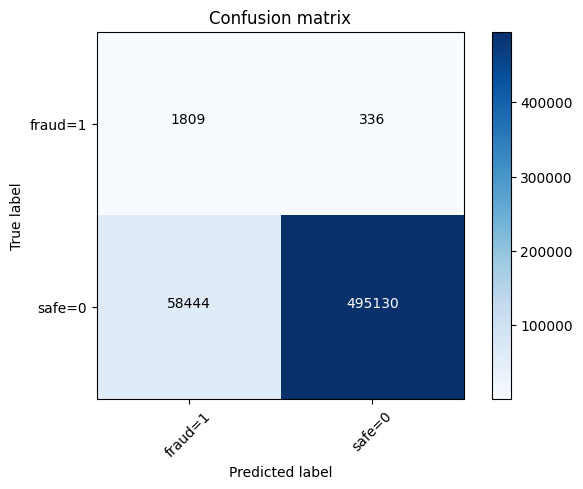

In [ ]:
cnf_matrix = confusion_matrix(testing_labels, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fraud=1','safe=0'],normalize= False,  title='Confusion matrix')